# Spatial Analytics exam

In this notebook we aim to visualize the process of processing the data, given by our data acquisition-process:
First we aim to read in all of our data-points in one big merged pandas dataframe:

In [37]:
import pandas as pd  #https://www.geeksforgeeks.org/how-to-merge-multiple-csv-files-into-a-single-pandas-dataframe/
import numpy as np
import re
import glob 
import os
import matplotlib
from matplotlib import colormaps

rieds = ['Ehren', 'Hoch', 'Grill', 'Steint', 'Steinm', 'Heilig']
wetterStation = {'Ehren': 3805, 'Hoch': 3805, 'Grill': 3805, 'Steint': 3805, 'Steinm': 3811, 'Heilig': 3811} #3805: Wetterstation Krems, 3811: Wetterstation Langenlois


wdf = pd.read_csv("MON_Datensatz.csv")

#Indexer
index = []
for count, i in enumerate(wdf['time']):
    res = str(i[0:7]) 
    res_2 = str(wdf['station'][count])
    index.append(res+ "-" + res_2)
wdf['indexer'] = index

print(wdf)

                       time  station  schreg      s  sonn0    t  schoenw  \
0    2017-01-01T00:00+00:00     3805     1.0   85.0   11.0 -3.6      NaN   
1    2017-01-01T00:00+00:00     3811     2.0   75.0   10.0 -3.9      6.0   
2    2017-02-01T00:00+00:00     3805     3.0   87.0    9.0  2.4      NaN   
3    2017-02-01T00:00+00:00     3811     0.0   82.0    8.0  2.1      6.0   
4    2017-03-01T00:00+00:00     3805     0.0  150.0    1.0  8.3      NaN   
..                      ...      ...     ...    ...    ...  ...      ...   
165  2023-11-01T00:00+00:00     3811     NaN   79.0    5.0  5.0      NaN   
166  2023-12-01T00:00+00:00     3805     3.0   52.0   10.0  3.6      4.0   
167  2023-12-01T00:00+00:00     3811     NaN   48.0   12.0  2.8      NaN   
168  2024-01-01T00:00+00:00     3805     0.0  107.0    6.0  1.1     10.0   
169  2024-01-01T00:00+00:00     3811     NaN   97.0    6.0  0.7      NaN   

     Tautemp    e  e10  festrr  rsum       indexer  
0        NaN  3.4 -0.9     7.0  11

In [38]:
print(os.getcwd())

for r in rieds:
    joined_files = os.path.join(r ,"*.csv") #All files
    joined_list = glob.glob(joined_files) 
    df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True) #joining

    #Indexer
    index = []
    for i in df['C0/date']:
        res = i[0:7]
        index.append(res)
    df['index'] = index

    df_1 = df.groupby(['index'])['C0/mean'].mean()
    df_2 = df.groupby(['index'])['C0/stDev'].mean()

    df_new = pd.merge(pd.DataFrame(df_1), pd.DataFrame(df_2), on='index')

    #Adding ried
    df_new['ried'] = np.repeat(r, len(df_new))
    df_new['wetterStation'] = df_new['ried'].map(wetterStation)
    df_new['id'] = df_new.index.values

    #Indexer
    indexer = []
    for count, i in enumerate(df_new['id']):
        res = str(i)
        res_2 = str(df_new['wetterStation'][count]) 
        indexer.append(res+ "-" + res_2)
    df_new['indexer'] = indexer

    
    df_tot = pd.merge(df_new, wdf, on='indexer', how="left")
    print(df_tot)

    outpath = os.path.join("pp", r + "_pp.csv")
    df_tot.to_csv(outpath)
    print(df_new)


c:\Users\jeggl\Documents\6sem\0A-Exam\spat\data
     C0/mean  C0/stDev   ried  wetterStation       id       indexer  \
0   0.472959  0.041233  Ehren           3805  2017-03  2017-03-3805   
1   0.531017  0.061505  Ehren           3805  2017-04  2017-04-3805   
2   0.633413  0.101563  Ehren           3805  2017-05  2017-05-3805   
3   0.532551  0.112162  Ehren           3805  2017-06  2017-06-3805   
4   0.561745  0.085928  Ehren           3805  2017-07  2017-07-3805   
5   0.651520  0.072981  Ehren           3805  2017-08  2017-08-3805   
6   0.637789  0.068886  Ehren           3805  2017-09  2017-09-3805   
7   0.481482  0.058635  Ehren           3805  2018-03  2018-03-3805   
8   0.604558  0.067376  Ehren           3805  2018-04  2018-04-3805   
9   0.645005  0.102412  Ehren           3805  2018-05  2018-05-3805   
10  0.592694  0.104460  Ehren           3805  2018-06  2018-06-3805   
11  0.612143  0.066628  Ehren           3805  2018-07  2018-07-3805   
12  0.579808  0.065183  Ehren

C:\Users\jeggl\AppData\Local\Temp\ipykernel_23004\423832357.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res_2 = str(df_new['wetterStation'][count])
C:\Users\jeggl\AppData\Local\Temp\ipykernel_23004\423832357.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res_2 = str(df_new['wetterStation'][count])
C:\Users\jeggl\AppData\Local\Temp\ipykernel_23004\423832357.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res_2 = s

Then I'm interested in preparing the wetter-Dataframe from the weather stations. It is done as follows:

                       time  station  schreg      s  sonn0    t  schoenw  \
0    2017-01-01T00:00+00:00     3805     1.0   85.0   11.0 -3.6      NaN   
1    2017-01-01T00:00+00:00     3811     2.0   75.0   10.0 -3.9      6.0   
2    2017-02-01T00:00+00:00     3805     3.0   87.0    9.0  2.4      NaN   
3    2017-02-01T00:00+00:00     3811     0.0   82.0    8.0  2.1      6.0   
4    2017-03-01T00:00+00:00     3805     0.0  150.0    1.0  8.3      NaN   
..                      ...      ...     ...    ...    ...  ...      ...   
165  2023-11-01T00:00+00:00     3811     NaN   79.0    5.0  5.0      NaN   
166  2023-12-01T00:00+00:00     3805     3.0   52.0   10.0  3.6      4.0   
167  2023-12-01T00:00+00:00     3811     NaN   48.0   12.0  2.8      NaN   
168  2024-01-01T00:00+00:00     3805     0.0  107.0    6.0  1.1     10.0   
169  2024-01-01T00:00+00:00     3811     NaN   97.0    6.0  0.7      NaN   

     Tautemp    e  e10  festrr  rsum       indexer  
0        NaN  3.4 -0.9     7.0  11

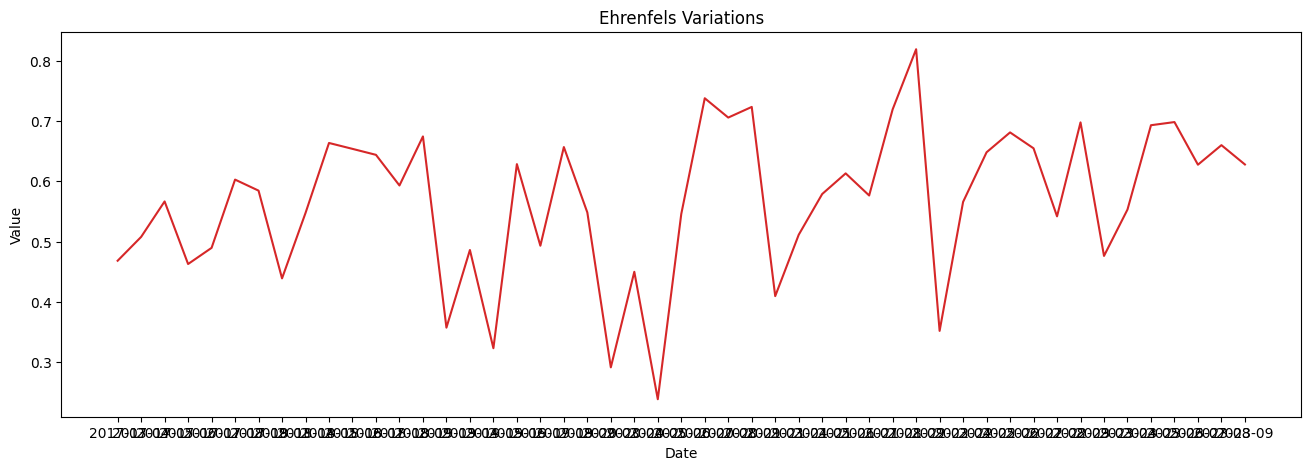

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt


df_test = pd.read_csv(os.path.join("data", "pp", "Grill_pp.csv"))

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_test, x=df_test['id'], y=df_test['C0/mean'], title='Ehrenfels Variations')    

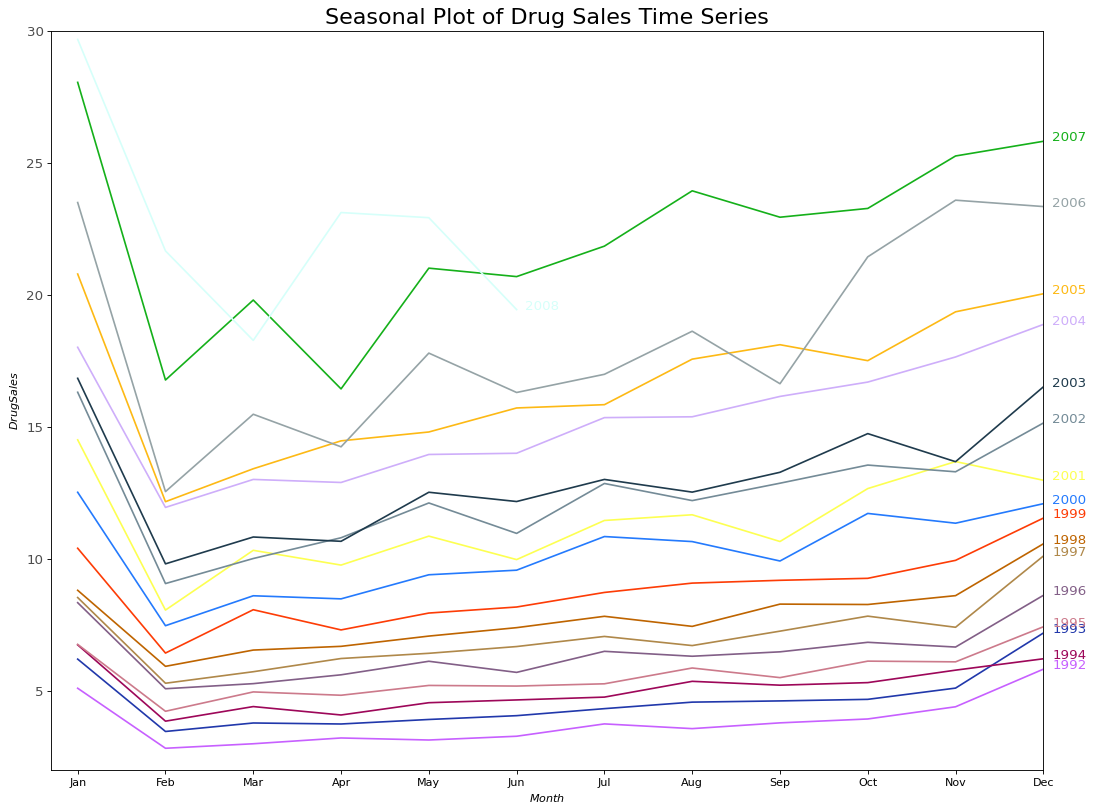

In [15]:
import numpy as np
import matplotlib as mpl

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [16]:
print(df)

          date      value  year month
0   1991-07-01   3.526591  1991   Jul
1   1991-08-01   3.180891  1991   Aug
2   1991-09-01   3.252221  1991   Sep
3   1991-10-01   3.611003  1991   Oct
4   1991-11-01   3.565869  1991   Nov
..         ...        ...   ...   ...
199 2008-02-01  21.654285  2008   Feb
200 2008-03-01  18.264945  2008   Mar
201 2008-04-01  23.107677  2008   Apr
202 2008-05-01  22.912510  2008   May
203 2008-06-01  19.431740  2008   Jun

[204 rows x 4 columns]


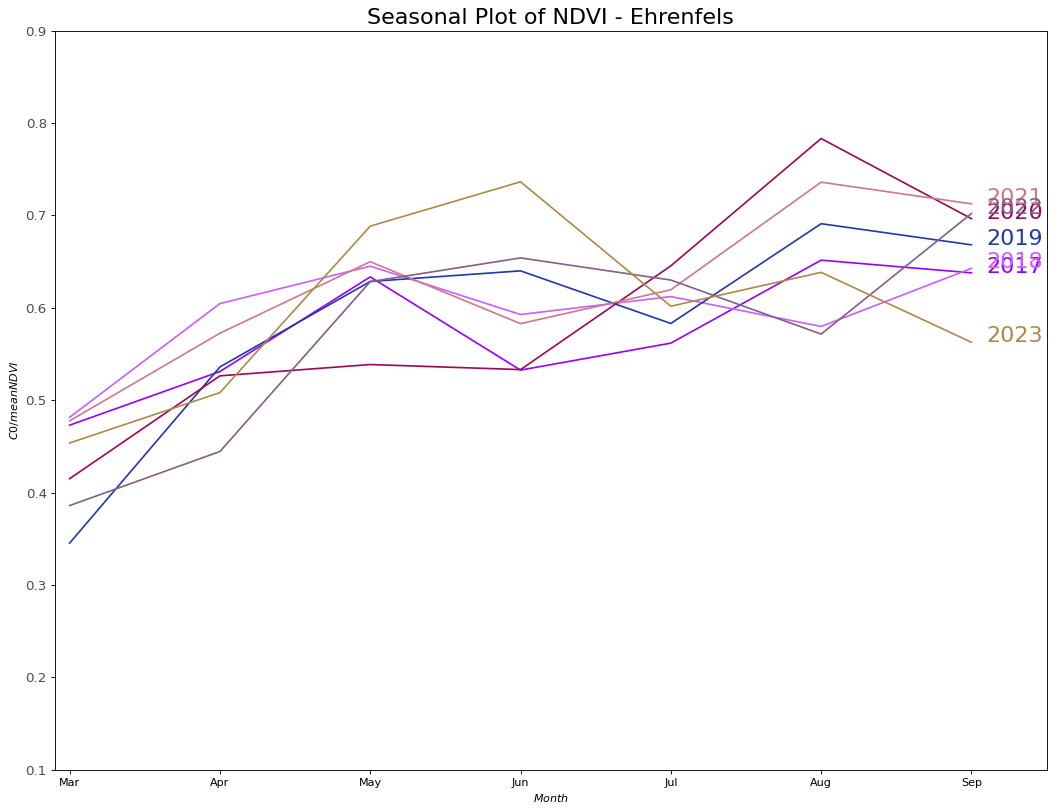

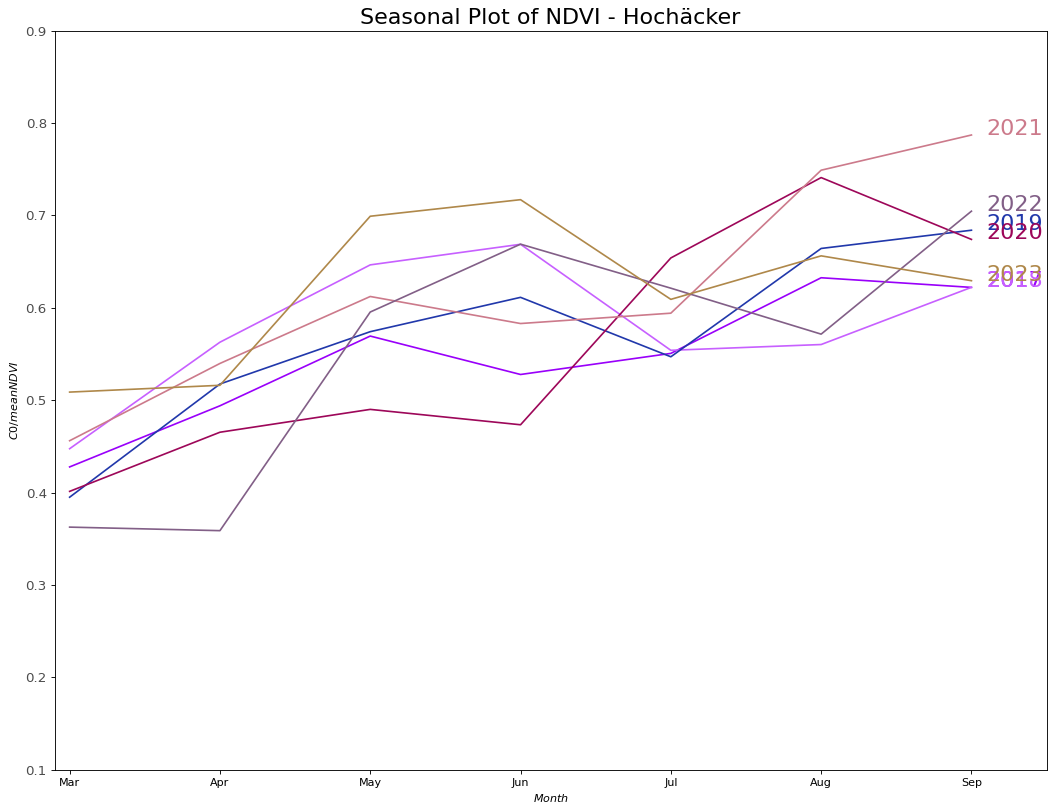

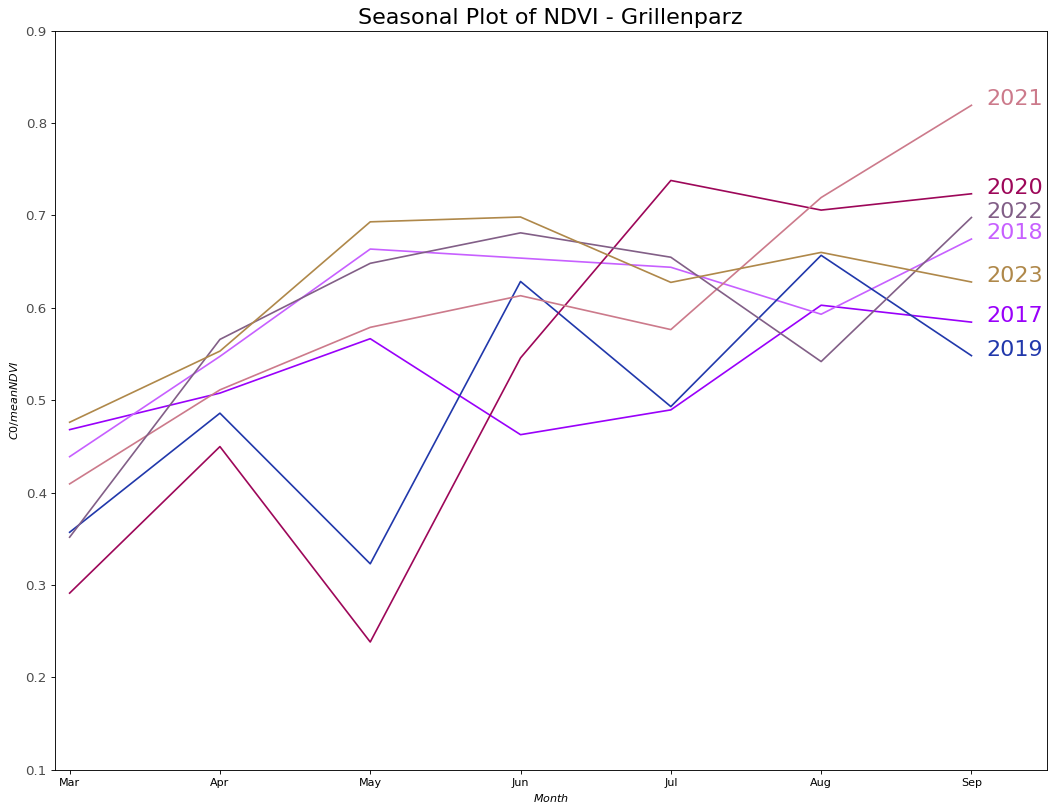

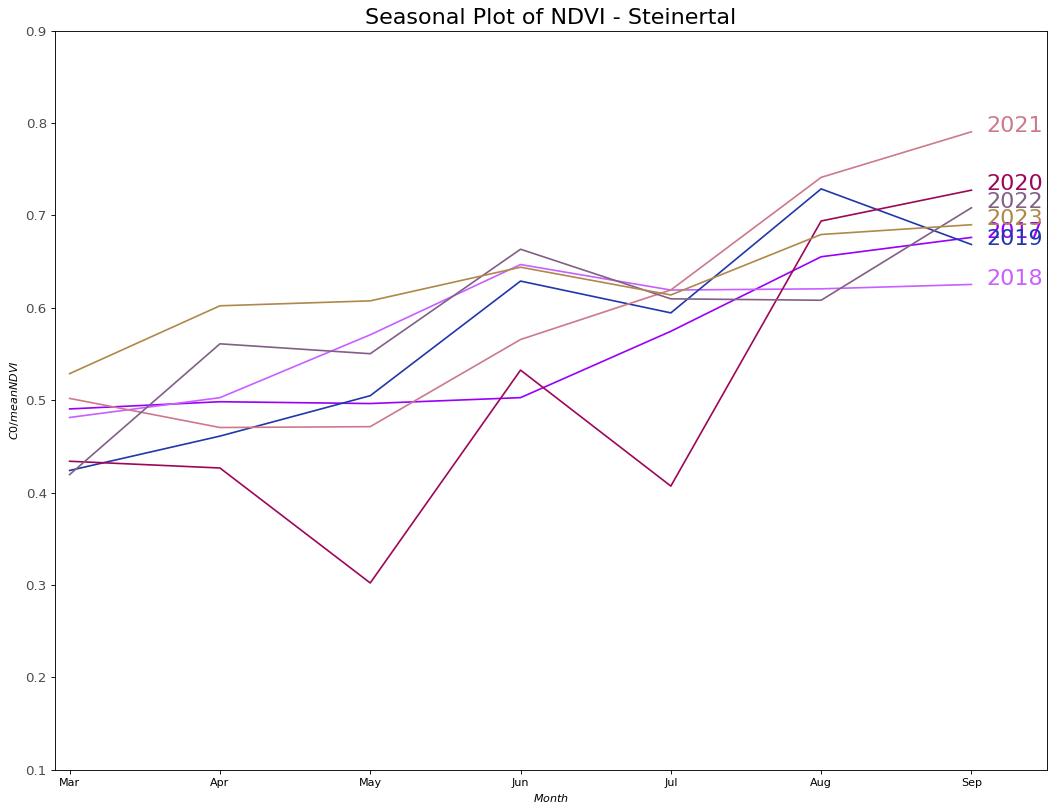

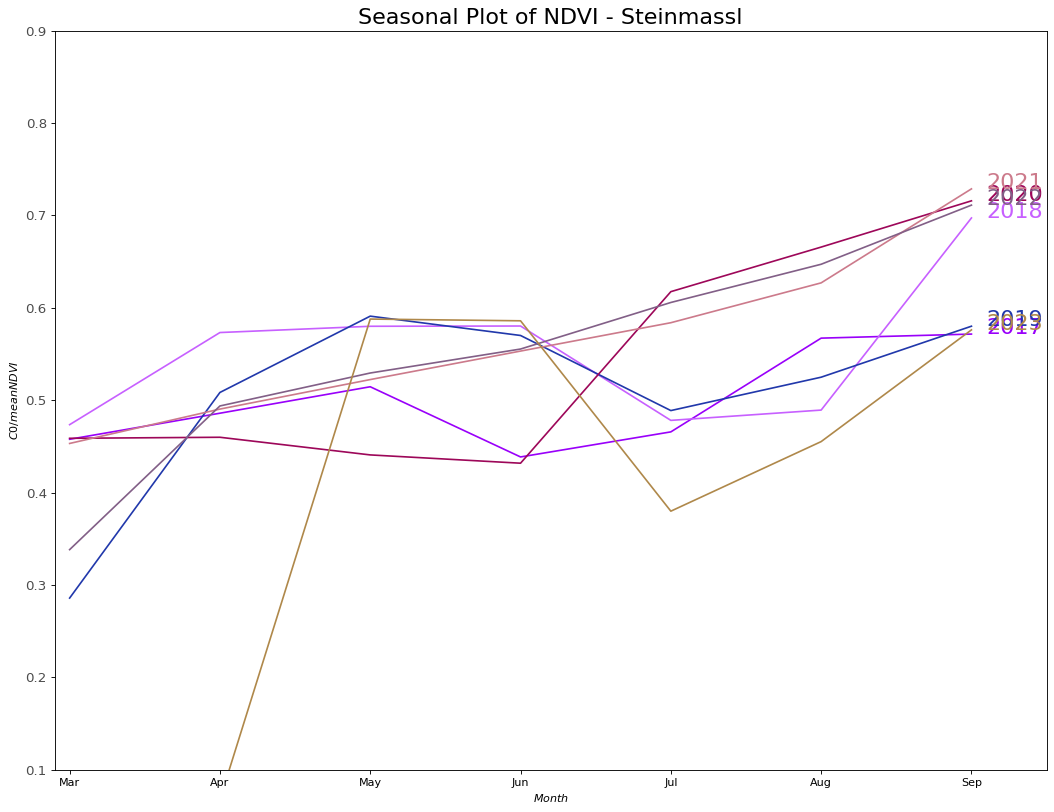

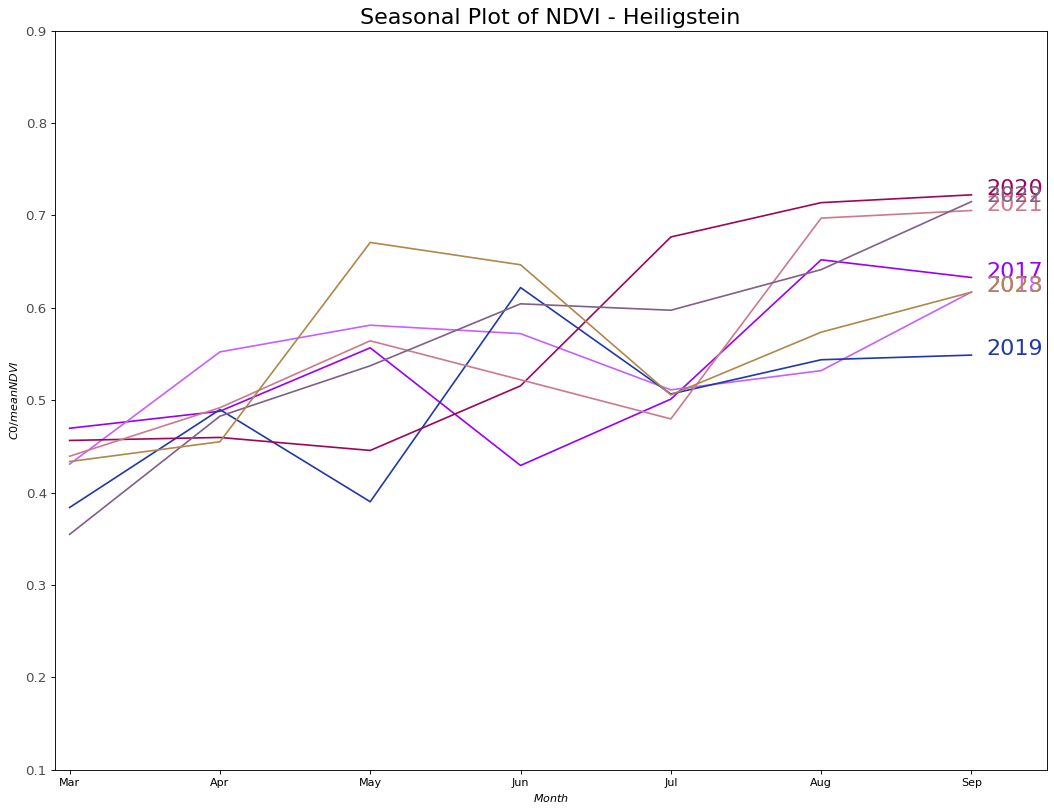

In [123]:
#Plotting mainly adapted from https://www.machinelearningplus.com/time-series/time-series-analysis-python/

import numpy as np
import matplotlib as mpl
rieds = ['Ehren', 'Hoch', 'Grill', 'Steint', 'Steinm', 'Heilig']
names = ['Ehrenfels', 'Hochäcker', 'Grillenparz', 'Steinertal', 'Steinmassl', 'Heiligstein']

for count, r in enumerate(rieds):
    # Import Data
    df = pd.read_csv(os.path.join("data", "pp", r + "_pp.csv"))
    df.reset_index(inplace=True)

    df['date'] = pd.to_datetime(df['time'])


    # Prepare data
    df['year'] = [d.year for d in df.date]
    df['month'] = [d.strftime('%b') for d in df.date]
    years = df['year'].unique()

#print(df)

    # Prep Colors
    np.random.seed(100)
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
    plt.figure(figsize=(16,12), dpi= 80)
    for i, y in enumerate(years):
        if i >= 0:        
            plt.plot('month', 'C0/mean', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
            plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'C0/mean'][-1:].values[0], y, fontsize=20, color=mycolors[i])

# Decoration
    plt.gca().set(xlim=(-0.1, 6.5), ylim=(0.1, 0.9), ylabel='$C0/mean NDVI$', xlabel='$Month$')
    plt.yticks(fontsize=12, alpha=.7)
    plt.title("Seasonal Plot of NDVI - " + names[count], fontsize=20)
    plt.savefig(r + "_Seasonal_plot.png")
    plt.show() 


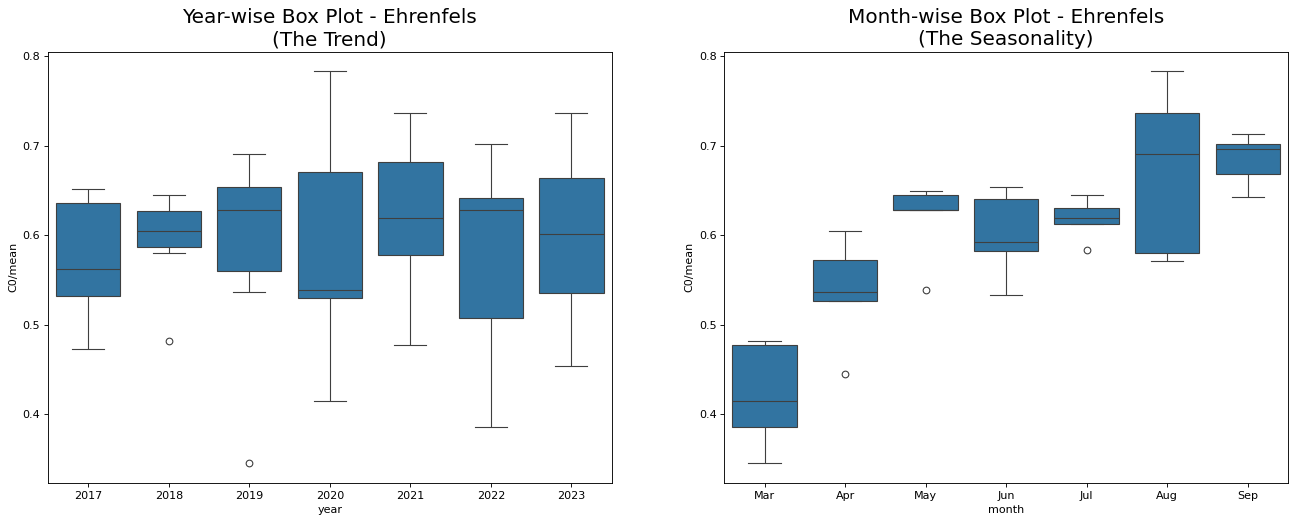

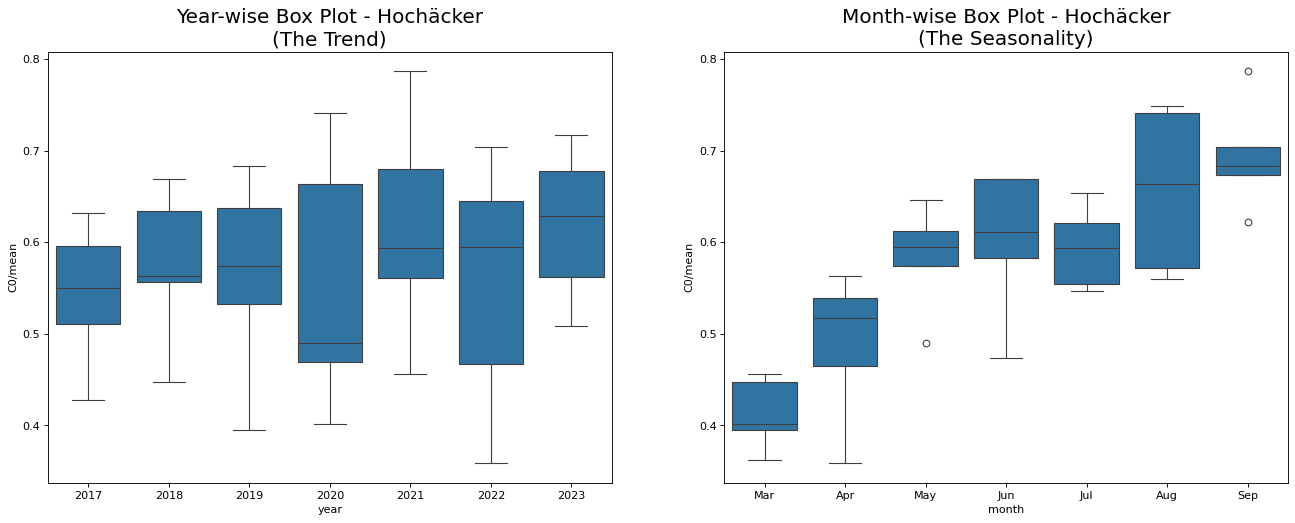

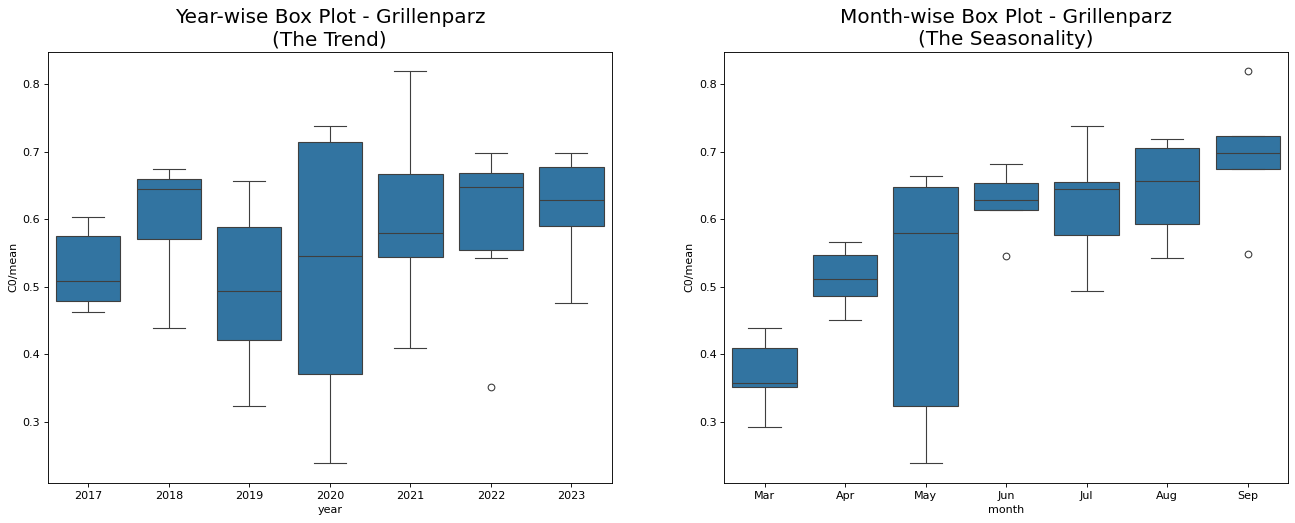

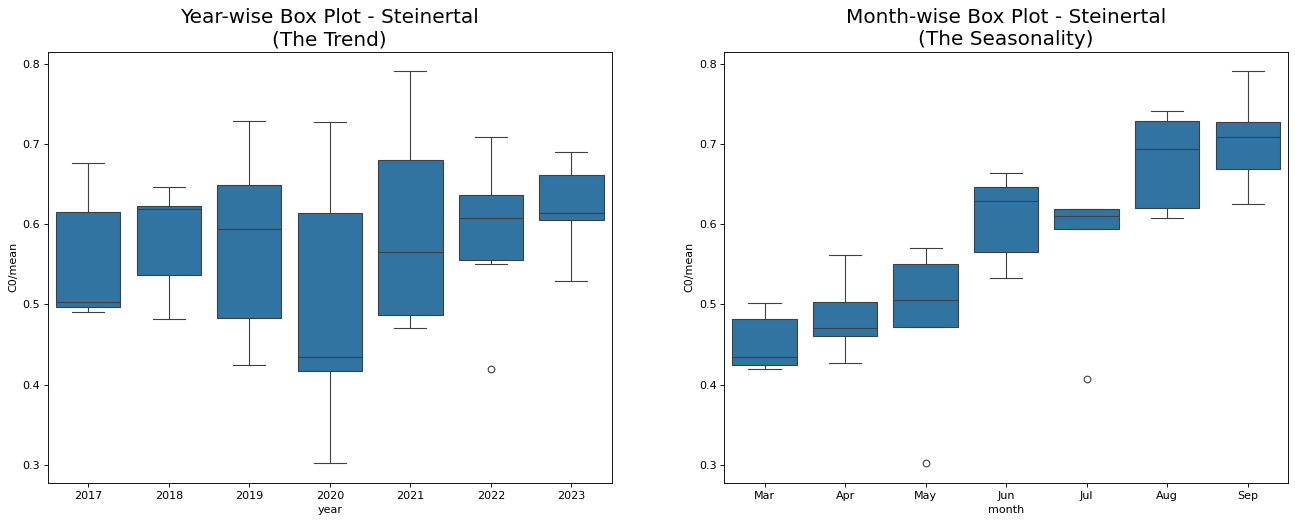

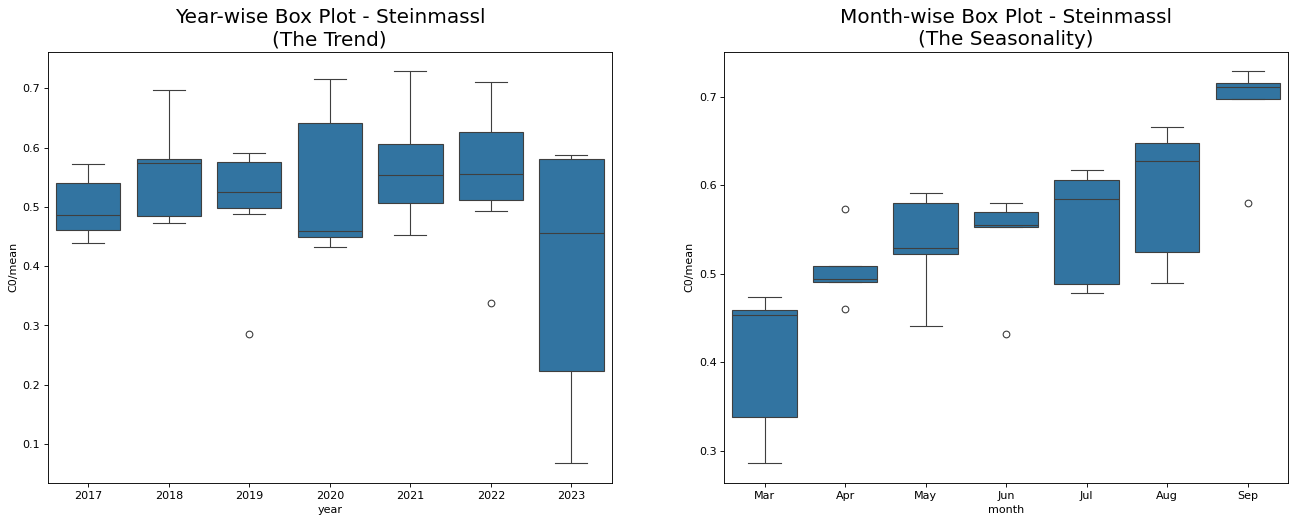

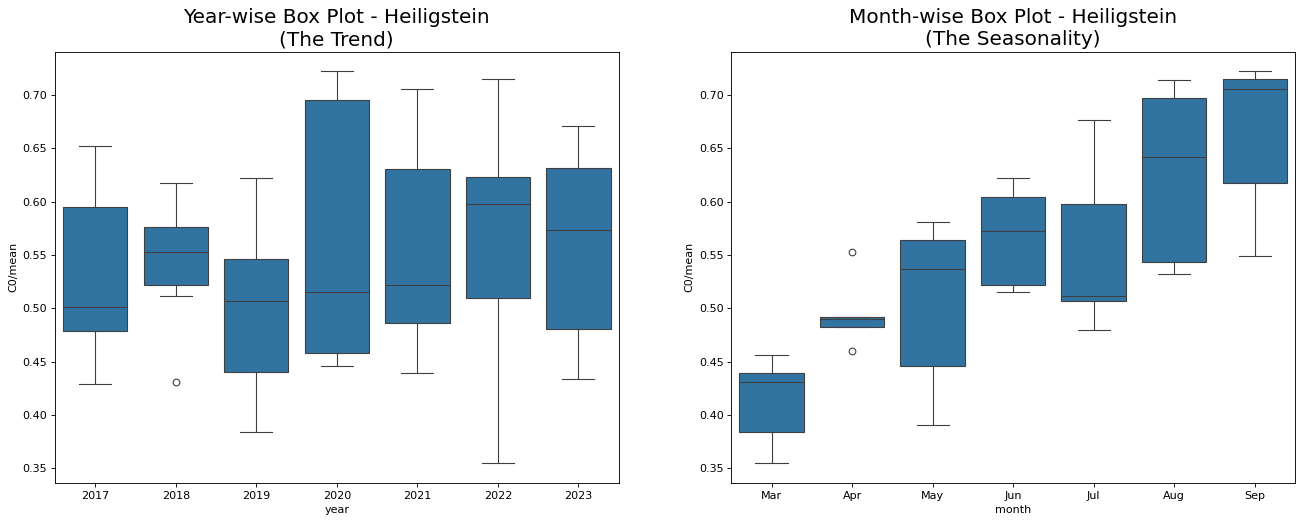

In [44]:
import seaborn as sns

for count, r in enumerate(rieds): 
    # Import Data
    df = pd.read_csv(os.path.join("data", "pp", r + "_pp.csv"))
    df.reset_index(inplace=True)

    df['date'] = pd.to_datetime(df['time'])

    # Prepare data
    df['year'] = [d.year for d in df.date]
    df['month'] = [d.strftime('%b') for d in df.date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
    sns.boxplot(x='year', y='C0/mean', data=df, ax=axes[0])
    sns.boxplot(x='month', y='C0/mean', data=df.loc[~df.year.isin([2017, 2023]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot - ' + names[count] + '\n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Box Plot - ' + names[count] + '\n(The Seasonality)', fontsize=18)
    plt.savefig(r + "_boxplot.png")
    plt.show()

     index  Unnamed: 0   C0/mean  C0/stDev    ried  wetterStation       id  \
0        0           0  0.472959  0.041233   Ehren           3805  2017-03   
1        1           1  0.531017  0.061505   Ehren           3805  2017-04   
2        2           2  0.633413  0.101563   Ehren           3805  2017-05   
3        3           3  0.532551  0.112162   Ehren           3805  2017-06   
4        4           4  0.561745  0.085928   Ehren           3805  2017-07   
..     ...         ...       ...       ...     ...            ...      ...   
289    289          44  0.607484  0.091965  Steint           3805  2023-05   
290    290          45  0.643916  0.073788  Steint           3805  2023-06   
291    291          46  0.613867  0.078622  Steint           3805  2023-07   
292    292          47  0.679312  0.079859  Steint           3805  2023-08   
293    293          48  0.689874  0.091387  Steint           3805  2023-09   

          indexer                    time  station  ...     t  

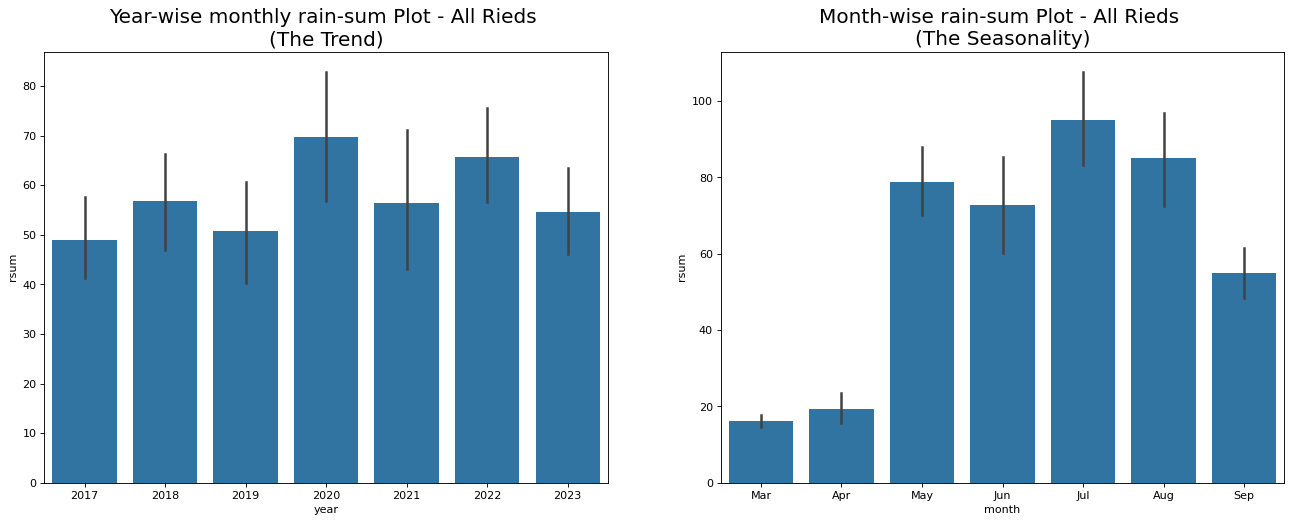

In [139]:
import glob

# Import Data
joined_files = os.path.join("data", "pp" ,"*.csv") #All files
joined_list = glob.glob(joined_files) 
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True) #joining
df.reset_index(inplace=True)

df['date'] = pd.to_datetime(df['time'])


# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

print(df)

#print(df)

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#sns.boxplot(x='year', y='C0/mean', data=df, ax=axes[0])
sns.barplot(x='year', y='rsum', data=df, ax=axes[0])
#sns.boxplot(x='month', y='C0/mean', data=df.loc[~df.year.isin([2017, 2023]), :])
sns.barplot(x='month', y='rsum', data=df.loc[~df.year.isin([2017, 2023]), :])

# Set Title
axes[0].set_title('Year-wise monthly rain-sum Plot - All Rieds \n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise rain-sum Plot - All Rieds \n(The Seasonality)', fontsize=18)
plt.savefig("All Rieds" + "_boxplot.png")
plt.show() 

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# Import Data
joined_files = os.path.join("data", "pp" ,"*.csv") #All files
joined_list = glob.glob(joined_files) 
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=False) #joining
df['date'] = pd.to_datetime(df['time'])
df = df.set_index('date')

df = df.filter(items=['date', 'C0/mean']).rename(columns= {'date':'date', 'C0/mean':'value'})
df = df.sort_index()
print(df)

df.to_csv(os.path.join("all_data.csv"))

                              value
date                               
2017-03-01 00:00:00+00:00  0.472959
2017-03-01 00:00:00+00:00  0.469613
2017-03-01 00:00:00+00:00  0.427755
2017-03-01 00:00:00+00:00  0.457699
2017-03-01 00:00:00+00:00  0.490527
...                             ...
2023-09-01 00:00:00+00:00  0.629294
2023-09-01 00:00:00+00:00  0.627891
2023-09-01 00:00:00+00:00  0.562691
2023-09-01 00:00:00+00:00  0.576080
2023-09-01 00:00:00+00:00  0.689874

[294 rows x 1 columns]


                value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]


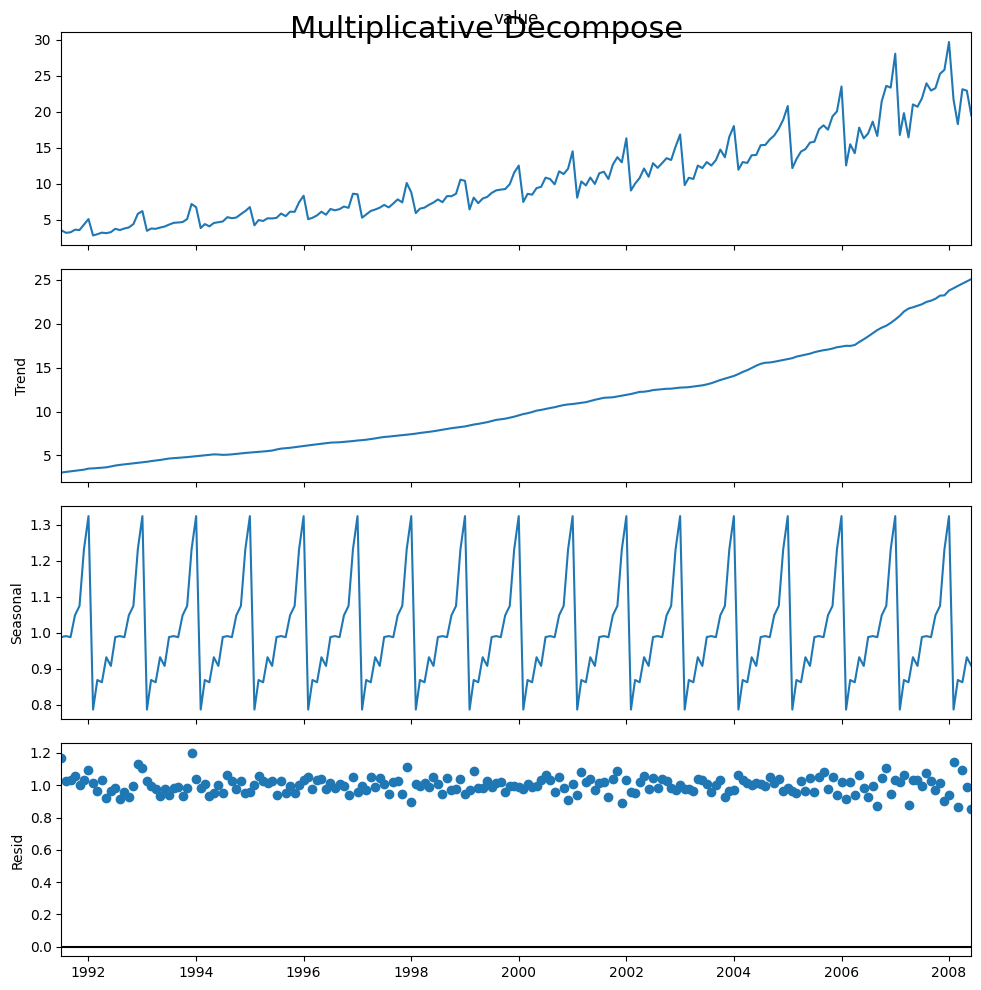

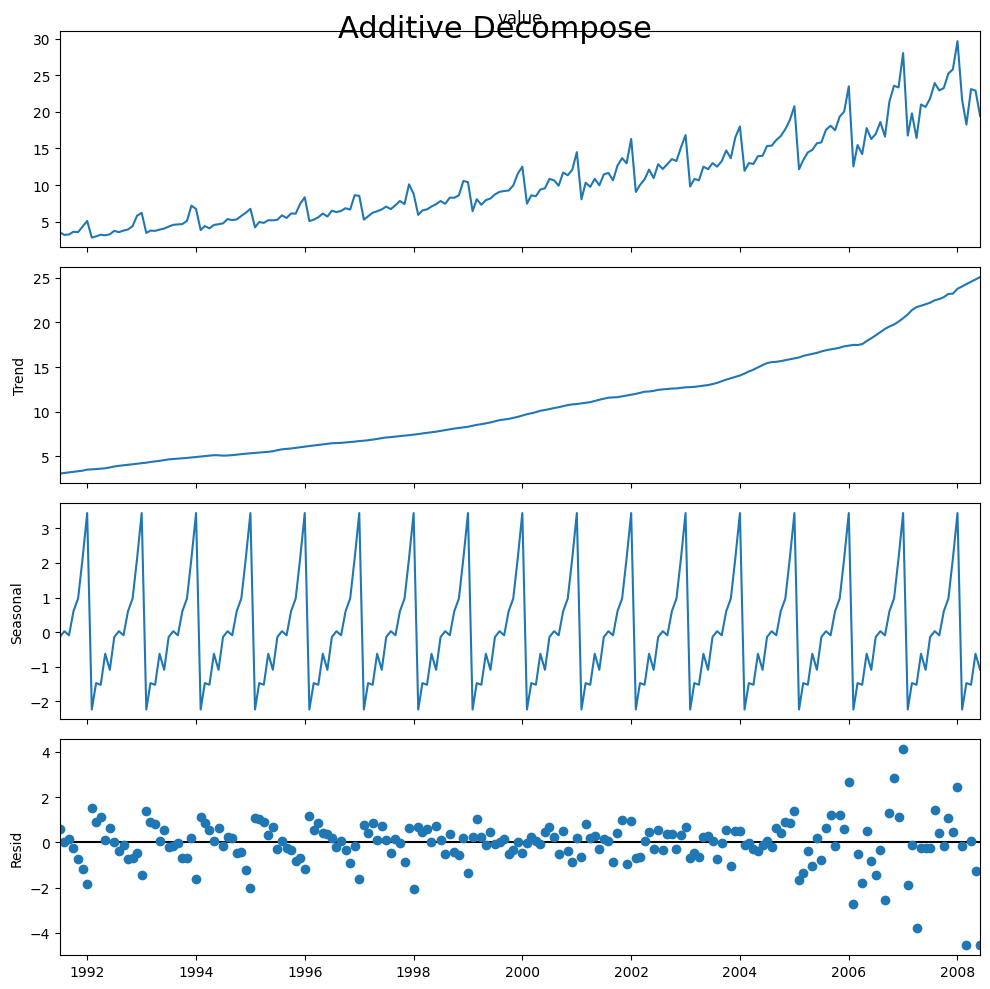

In [95]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
print(df)
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

                              value
date                               
2017-03-01 00:00:00+00:00  0.464445
2017-04-01 00:00:00+00:00  0.500810
2017-05-01 00:00:00+00:00  0.556151
2017-06-01 00:00:00+00:00  0.482274
2017-07-01 00:00:00+00:00  0.523879
2017-08-01 00:00:00+00:00  0.626843
2017-09-01 00:00:00+00:00  0.620799
2018-03-01 00:00:00+00:00  0.458897
2018-04-01 00:00:00+00:00  0.557143
2018-05-01 00:00:00+00:00  0.614486
2018-06-01 00:00:00+00:00  0.619038
2018-07-01 00:00:00+00:00  0.569744
2018-08-01 00:00:00+00:00  0.562471
2018-09-01 00:00:00+00:00  0.646453
2019-03-01 00:00:00+00:00  0.365163
2019-04-01 00:00:00+00:00  0.499782
2019-05-01 00:00:00+00:00  0.501900
2019-06-01 00:00:00+00:00  0.616748
2019-07-01 00:00:00+00:00  0.535489
2019-08-01 00:00:00+00:00  0.634876
2019-09-01 00:00:00+00:00  0.616256
2020-03-01 00:00:00+00:00  0.409434
2020-04-01 00:00:00+00:00  0.464590
2020-05-01 00:00:00+00:00  0.409243
2020-06-01 00:00:00+00:00  0.505348
2020-07-01 00:00:00+00:00  0

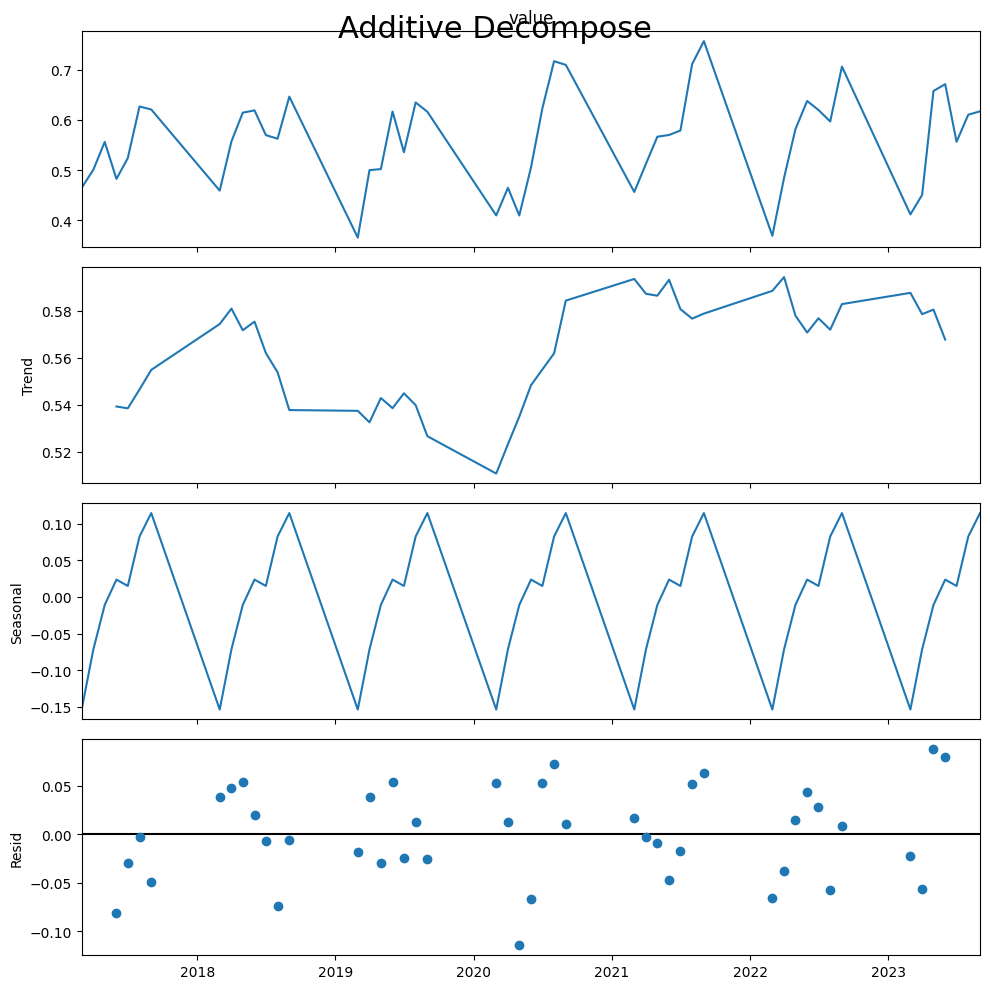

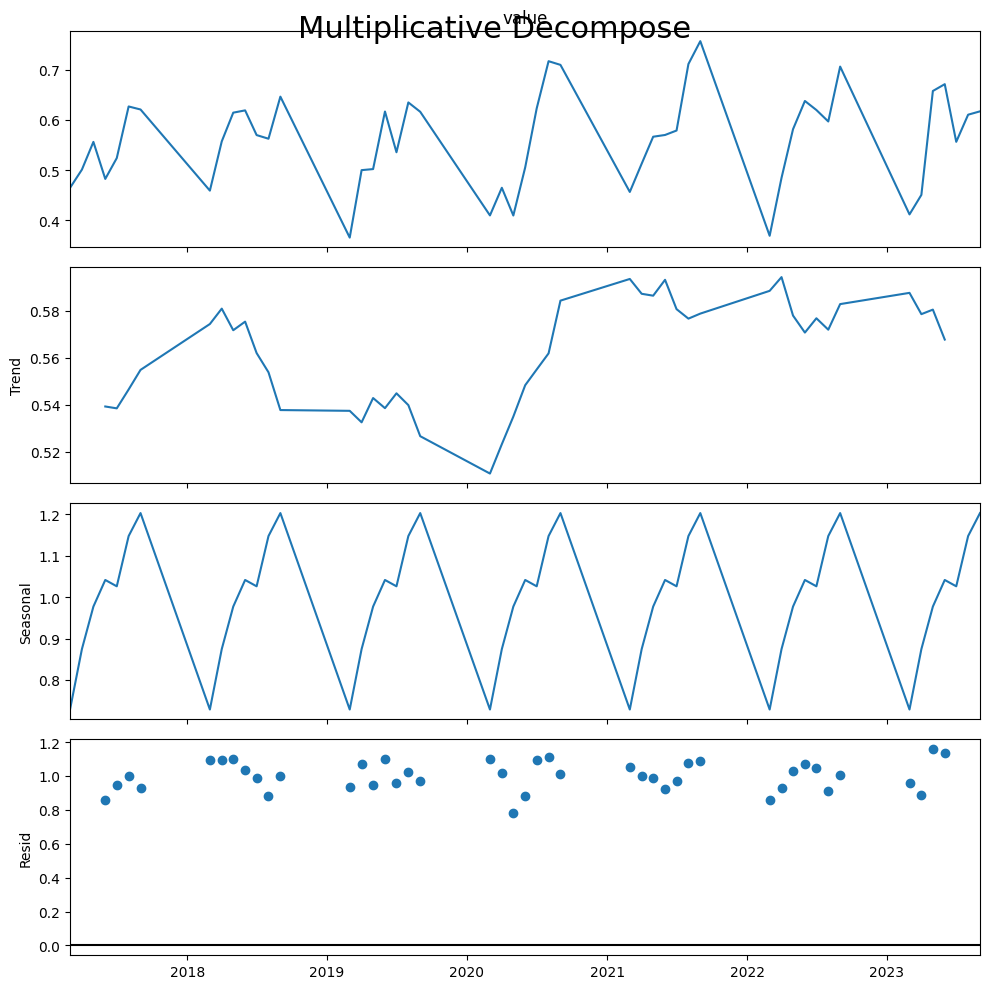

In [125]:
df_n = pd.read_csv("all_data.csv", parse_dates=['date'], index_col='date')
df_1 = df_n.groupby(['date'])['value'].mean()
df_new = pd.DataFrame(df_1)
#print(df_n)
print(df_new)

# Additive Decomposition
result_add = seasonal_decompose(df_new['value'], model='additive', period=7)
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_new['value'], model='multiplicative', period=7)


# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
#plt.savefig("All Rieds" + "seasonalityandtrend_mul.png")
plt.show()

In [104]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
print(df_reconstructed)

                               seas     trend     resid  actual_values
date                                                                  
2017-03-01 00:00:00+00:00  0.728684       NaN       NaN       0.464445
2017-04-01 00:00:00+00:00  0.874627       NaN       NaN       0.500810
2017-05-01 00:00:00+00:00  0.977420       NaN       NaN       0.556151
2017-06-01 00:00:00+00:00  1.041691  0.539314  0.858445       0.482274
2017-07-01 00:00:00+00:00  1.026367  0.538522  0.947819       0.523879
2017-08-01 00:00:00+00:00  1.147823  0.546569  0.999168       0.626843
2017-09-01 00:00:00+00:00  1.203388  0.554903  0.929668       0.620799
2018-03-01 00:00:00+00:00  0.728684  0.574441  1.096303       0.458897
2018-04-01 00:00:00+00:00  0.874627  0.580993  1.096411       0.557143
2018-05-01 00:00:00+00:00  0.977420  0.571797  1.099484       0.614486
2018-06-01 00:00:00+00:00  1.041691  0.575462  1.032671       0.619038
2018-07-01 00:00:00+00:00  1.026367  0.562071  0.987611       0.569744
2018-0

In [110]:
from statsmodels.tsa.stattools import adfuller, kpss

df = pd.read_csv(os.path.join("all_data.csv"))
df_1 = df_n.groupby(['date'])['value'].mean()
df_new = pd.DataFrame(df_1)


# ADF Test
result = adfuller(df_new.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -1.5508955165655185
p-value: 0.5082008432706188
Critial Values:
   1%, -3.596635636000432
Critial Values:
   5%, -2.933297331821618
Critial Values:
   10%, -2.6049909750566895


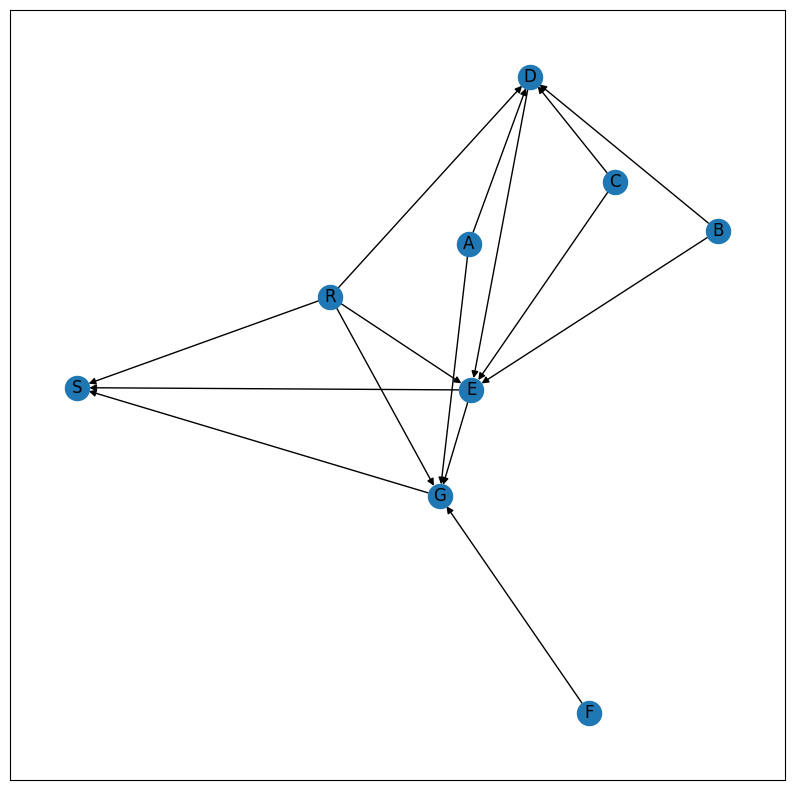

In [119]:
import networkx as nx
graph = nx.DiGraph()
graph.add_edges_from([("A", "D"), ("A", "G"), ("B", "D"), ("B", "E"), ("C", "D"), ("C", "E"), ("D", "E"), ("E", "G"), ("E", "S"), ("F", "G"), ("G", "S"), ("R", "S"), ("R", "G"), ("R", "E"), ("R", "D")])
nx.draw_networkx(graph)

From here on, I want to create a visualisation of the overall computational consumption for each assignment. I use the same code, as I used in assignment 4

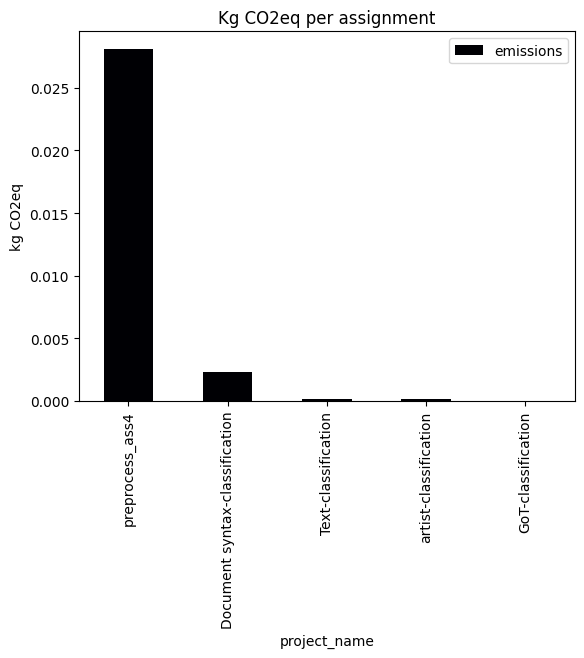

In [17]:
plot = df.plot.bar(x='project_name', y='emissions', colormap = 'inferno', title = "Kg CO2eq per assignment", ylabel = "kg CO2eq")
outpath = os.path.join("..", "out", "total_emission.png")
fig = plot.get_figure()
fig.savefig(outpath) #No try-statement is needed since savefig will simply overwrite existing files

Which makes it quite clear that assignment 4 and 1 are the far most heavy computations. Yet I find the emissions quite minor: While the most heavy computational task of my portfolio emits around 25 grammes of CO2eq, driving a car emits approx 400 g per mile driven, [EPA.gov](https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle). Let's say that I was interested in tracking the assignments further and took the ass4-out. That generates the following:

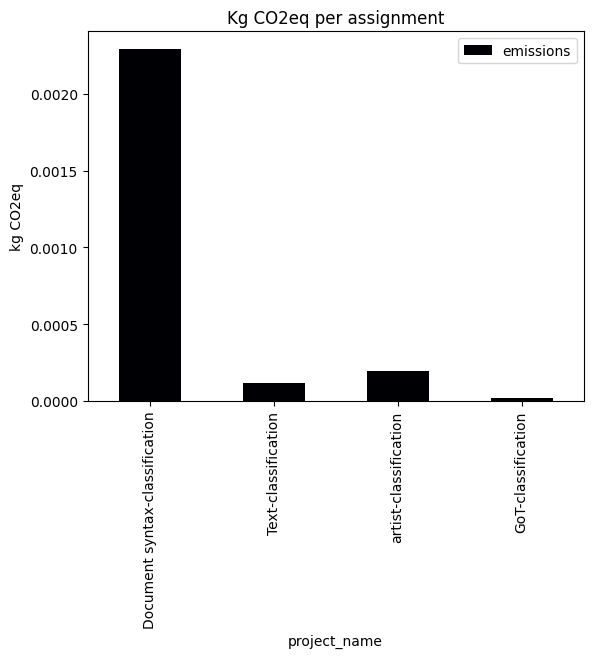

In [18]:
df_no = df.drop(0)
plot = df_no.plot.bar(x='project_name', y='emissions', colormap = 'inferno', title = "Kg CO2eq per assignment", ylabel = "kg CO2eq")

Which makes it quite clear that it is really minor emissions I have from everything apart from the preprocessing of assignment 4 - luckily I have made sure that this heavy computation is only done once! 

But why is this so? Taking a look at the computations, it is clear that the time is a very important factor for the emissions - but it also seems like the very low-key-processing is what takes a lot of computation. In assignment 4, I needed to take every single utterance out, make a call to the model and record it, but assignment 1 does essentially the same repetitive computation: Taking each token of each essay and running them over seven times! 
One could of course make this more effective, but looking at the overall emissions, this seems a bit overkill. Consult assignment 1 for further considerations!

# Subtask emissions

I can do the excact same thing for the subtasks recorded. Since I have numbered these, they should be readable from left to right, despite their similar names, in the following order: [Assignment 1, Assignment 2 LogReg, Assignment 2 MLP, Assignment 3, Assignment 4]

              task_name            timestamp                    project_name  \
0            main_Setup  2024-05-26T12:30:13  Document syntax-classification   
1   main_Run and export  2024-05-26T12:33:56  Document syntax-classification   
2            main_Setup  2024-05-26T13:00:30             Text-classification   
3              main_Run  2024-05-26T13:00:30             Text-classification   
4           main_Export  2024-05-26T13:00:30             Text-classification   
5            main_Setup  2024-05-26T13:01:35             Text-classification   
6              main_Run  2024-05-26T13:01:39             Text-classification   
7           main_Export  2024-05-26T13:01:39             Text-classification   
8            main_Setup  2024-05-26T13:19:30           artist-classification   
9                Gensim  2024-05-26T13:19:30           artist-classification   
10           Preprocess  2024-05-26T13:19:30           artist-classification   
11          main_Export  2024-05-26T13:1

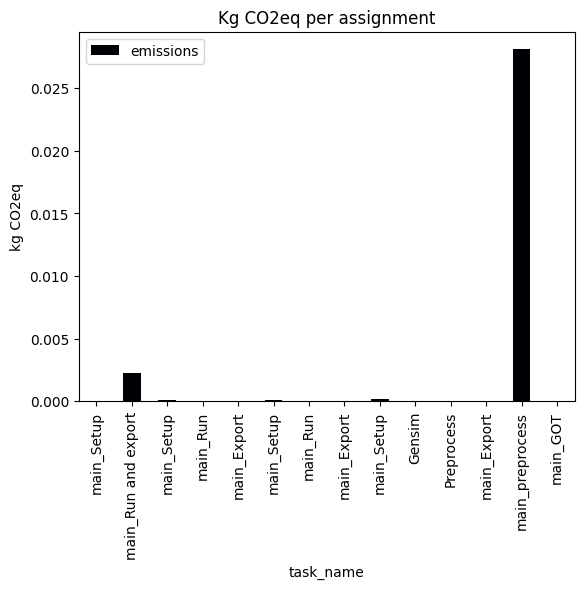

In [21]:
# same as before
joined_files = os.path.join("..", "data", "subtasks", "*.csv") 
joined_list = glob.glob(joined_files) 
  
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True) 
print(df) 

plot = df.plot.bar(x='task_name', y='emissions', colormap = 'inferno', title = "Kg CO2eq per assignment", ylabel = "kg CO2eq")
outpath = os.path.join("..", "out", "task_emission.png")
fig = plot.get_figure()
fig.savefig(outpath) #No try-statement is needed since savefig will simply overwrite existing files

Again we see the same (and expected) pattern about what takes up the most computation. We can try to remove these two tasks to dive into the very minor processes of the portfolio's emissions

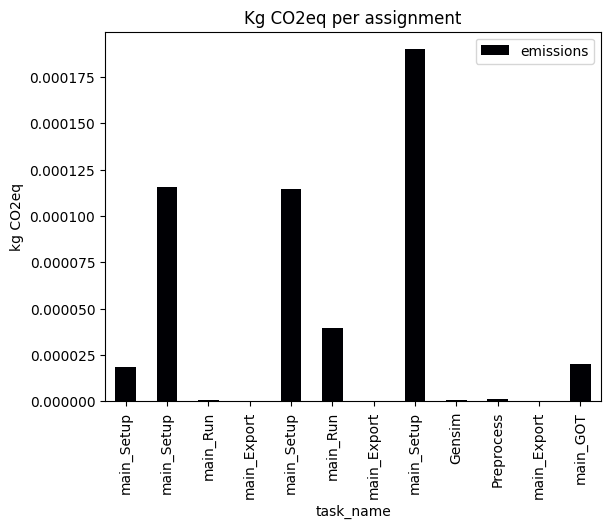

In [22]:
df_no = df.drop([1,12])
plot = df_no.plot.bar(x='task_name', y='emissions', colormap = 'inferno', title = "Kg CO2eq per assignment", ylabel = "kg CO2eq")

Note that we are now below 1.75E-04 kg (under a gram) of CO2eq(!)
It is now revealed that the second most heavy task is primarily the loading in of models, which is done during the setup-phase. The Gensim-model appear to be a little bit heavier than the MLP and LogReg-models. 